Import Libraries 

In [16]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('averaged_perceptron_tagger')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\achoudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Import the csv file using pandas dataframe

In [18]:
df = pd.read_csv('Data(EDA_done).csv')

In [19]:
df.head()

,Review_Title,Review_Text,Review_Location,Product,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,Undisclosed,Multi-Vitamin Thermafoliant,0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,Undisclosed,Multi-Vitamin Thermafoliant,0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,Undisclosed,Multi-Vitamin Thermafoliant,0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,Undisclosed,Multi-Vitamin Thermafoliant,0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,Undisclosed,Multi-Vitamin Thermafoliant,0.6486,1


Preparing x and y variables 

In [20]:
y = df['sentiment']

In [21]:
df.head()

,Review_Title,Review_Text,Review_Location,Product,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,Undisclosed,Multi-Vitamin Thermafoliant,0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,Undisclosed,Multi-Vitamin Thermafoliant,0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,Undisclosed,Multi-Vitamin Thermafoliant,0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,Undisclosed,Multi-Vitamin Thermafoliant,0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,Undisclosed,Multi-Vitamin Thermafoliant,0.6486,1


You need to convert the dtype object to unicode string

In [25]:
cv=CountVectorizer()
x = cv.fit_transform(df['Review_Text'].values.astype('U'))

In [26]:
print(cv.vocabulary_)

{'love': 1843, 'use': 3345, 'face': 1163, 'shower': 2771, 'heat': 1492, 'give': 1370, 'light': 1784, 'scrub': 2688, 'nice': 2078, 'even': 1090, 'better': 351, 'daili': 786, 'microfoli': 1947, 'obsess': 2122, 'skin': 2809, 'much': 2022, 'smoother': 2852, 'enjoy': 1060, 'product': 2393, 'look': 1828, 'forward': 1297, 'realli': 2477, 'feel': 1205, 'great': 1425, 'never': 2069, 'tri': 3247, 'anyth': 215, 'like': 1789, 'appli': 225, 'get': 1360, 'littl': 1807, 'shot': 2766, 'warm': 3405, 'good': 1399, 'seem': 2707, 'gritti': 1434, 'side': 2777, 'effect': 1021, 'encount': 1051, 'posit': 2339, 'one': 2149, 'exfoli': 1128, 'smooth': 2850, 'irrit': 1668, 'reaction': 2469, 'highli': 1517, 'recommend': 2495, 'buy': 488, 'wet': 3440, 'dri': 982, 'control': 710, 'abra': 81, 'leav': 1759, 'soft': 2865, 'drench': 980, 'vitamin': 3389, 'absolut': 82, 'truli': 3260, 'multivitamin': 2029, 'thermafoli': 3145, 'last': 1741, 'year': 3518, 'happi': 1464, 'purcha': 2421, 'directli': 927, 'sinc': 2795, 'longe

In [27]:
X=x.toarray()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [30]:

sm=SMOTE(random_state=42,sampling_strategy = 1.0)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [31]:
unique,count = np.unique(y_train_sm,return_counts=True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique,count)}
y_train_smote_value_count

{0: 2465, 1: 2465}

In [ ]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squred_error(true,predicted))
    r2_square= r2_score(true,predicted)
    return mae,rmse,r2_square

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
sc = StandardScaler(with_mean=False)
x_train_sc = sc.fit(x_train_sm)
print(x_train_sc)
x_train = x_train_sc.transform(x_train_sm)
x_test = x_train_sc.transform(x_test)
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train_sm, y_train_sm)  

StandardScaler(with_mean=False)


KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred= classifier.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [35]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_sm,y_train_sm)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))  

Text(0.5, 1.0, 'error rate vs  k ')

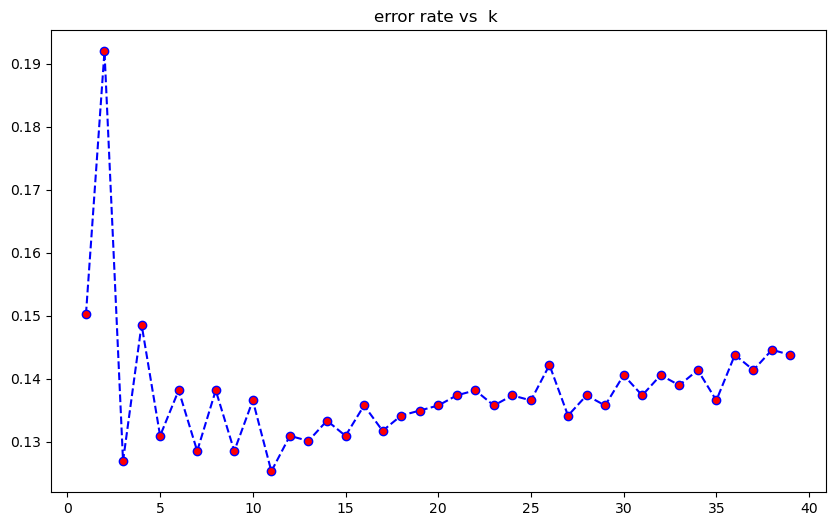

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker = 'o', markerfacecolor = 'red',color='blue',linestyle = 'dashed')
plt.title("error rate vs  k ")

In [37]:
classifier= KNeighborsClassifier(n_neighbors=21)  
classifier.fit(x_train_sm, y_train_sm)  
y_pred= classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("the accuracy in KNN Classifier is ", accuracy )
cr=classification_report(y_test,y_pred)
print(cr)

the accuracy in KNN Classifier is  0.8626506024096385
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       177
           1       0.91      0.93      0.92      1068

    accuracy                           0.86      1245
   macro avg       0.72      0.69      0.70      1245
weighted avg       0.86      0.86      0.86      1245



In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [39]:
pred = dtree.predict(x_test)

In [40]:
accuracy=accuracy_score(y_test,pred)
print("accuracy of decision tree classifier is ",accuracy)
print(classification_report(y_test,pred))

accuracy of decision tree classifier is  0.9036144578313253
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       177
           1       0.95      0.94      0.94      1068

    accuracy                           0.90      1245
   macro avg       0.80      0.82      0.81      1245
weighted avg       0.91      0.90      0.91      1245



In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [42]:
rfc_pred = rfc.predict(x_test)

In [43]:
accuracy=accuracy_score(y_test,rfc_pred)
print("accuracy in random forest classifier is ",accuracy )
print(classification_report(y_test,rfc_pred))

accuracy in random forest classifier is  0.9228915662650602
              precision    recall  f1-score   support

           0       0.81      0.59      0.69       177
           1       0.94      0.98      0.96      1068

    accuracy                           0.92      1245
   macro avg       0.87      0.79      0.82      1245
weighted avg       0.92      0.92      0.92      1245



In [44]:
print(confusion_matrix(y_test,rfc_pred))

[[ 105   72]
 [  24 1044]]
